In [2]:
# Data
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Visual
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/stocks.csv")
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,02/07/2023,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,02/08/2023,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,02/09/2023,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,02/10/2023,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,02/13/2023,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,218.671448,221.334984,216.124871,218.801028,218.782052,3.208210e+07
std,104.283265,105.219203,103.025609,104.084010,104.078275,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,246.974998,250.964996,245.669998,247.430000,247.430000,2.734000e+07
75%,304.697495,307.800011,297.000000,304.507492,304.507492,4.771772e+07
max,1000.350006,1000.000000,1000.850006,1000.550003,1000.550003,1.133164e+08


In [6]:
df.Ticker.value_counts()

,count
Ticker,
AAPL,62
MSFT,62
NFLX,62
GOOG,62


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

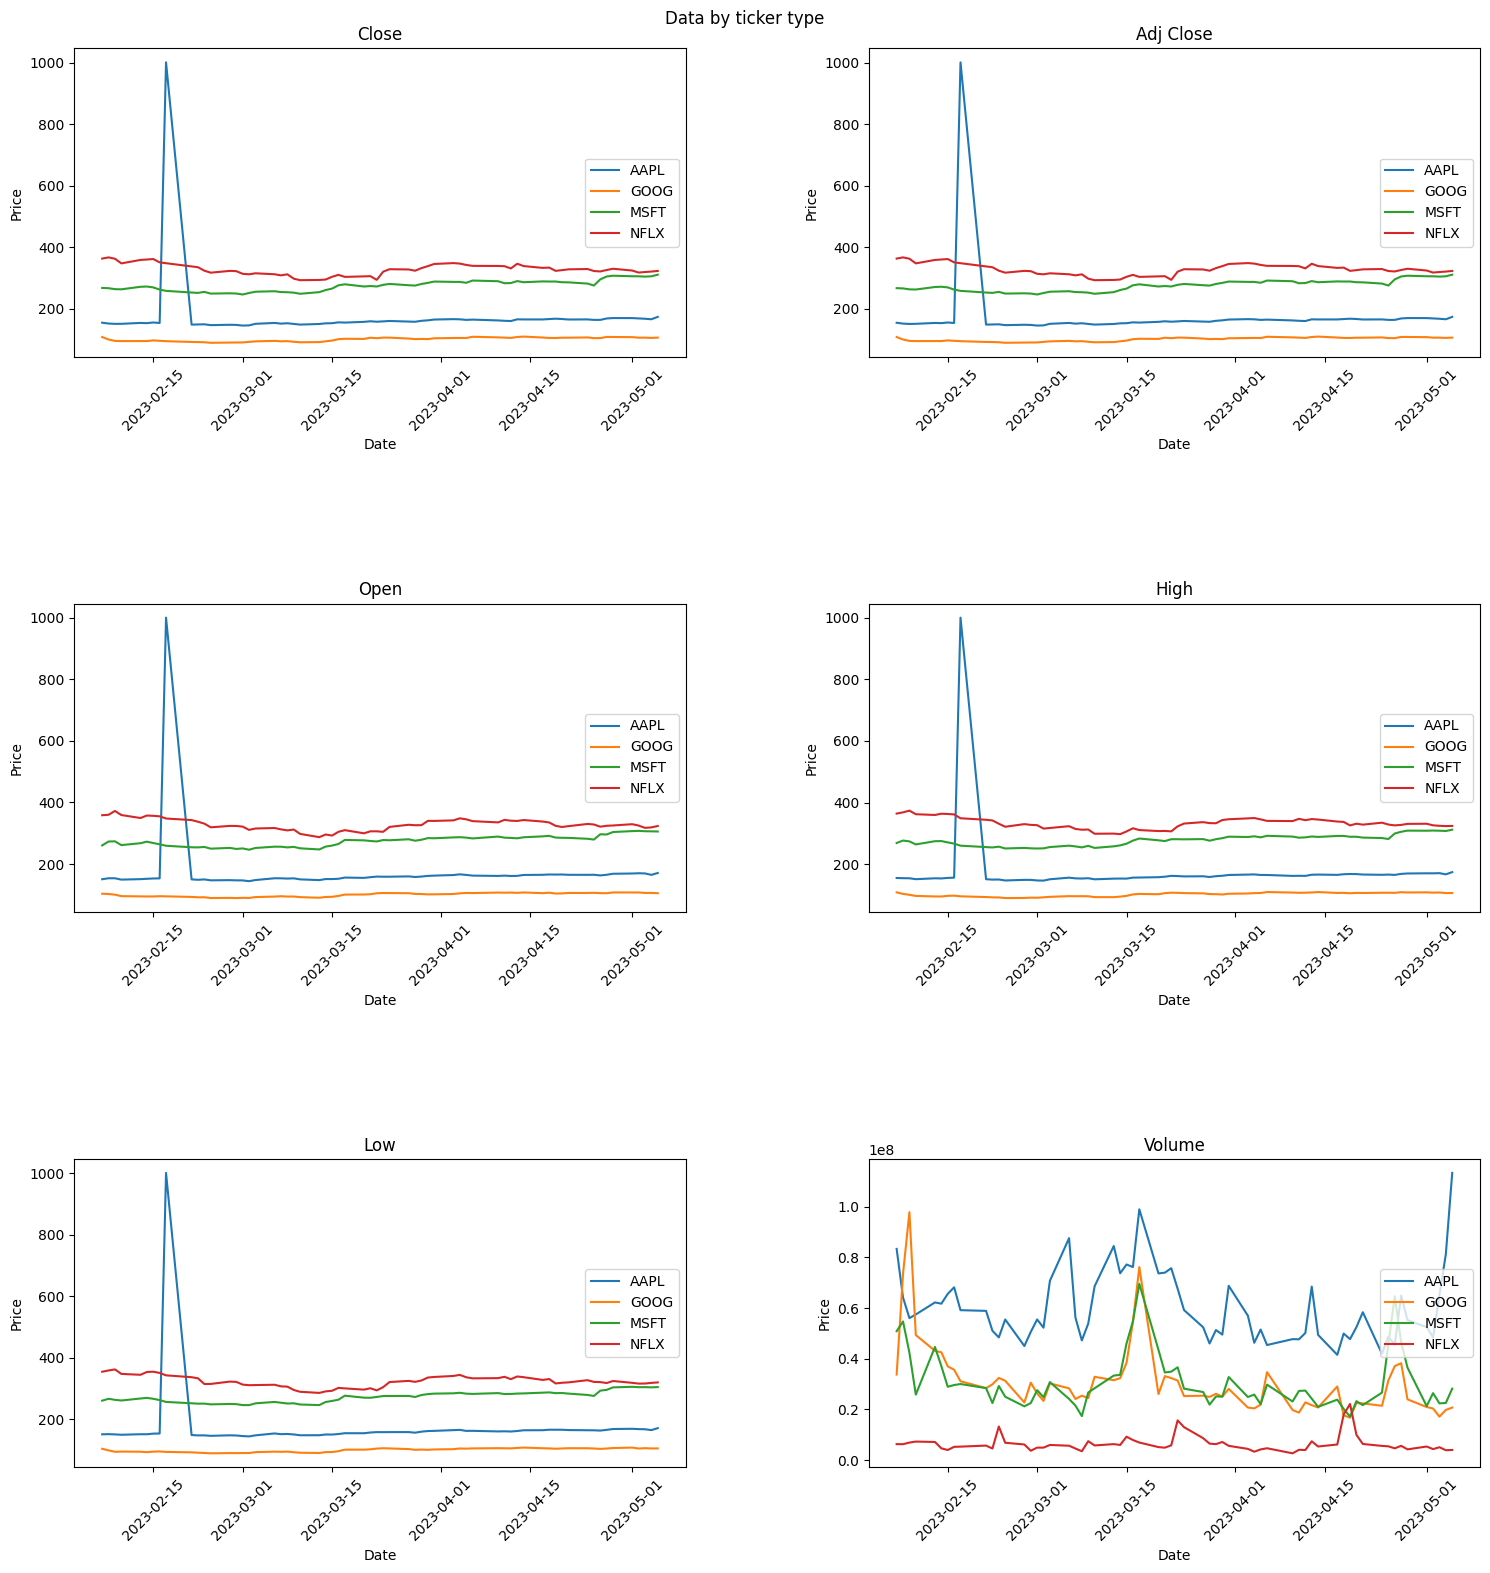

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(15, 16))
fig.suptitle('Data by ticker type')

cols = ['Close', 'Adj Close', 'Open', 'High', 'Low', 'Volume']

for i, col in enumerate(cols):
    row = i // 2
    col = i % 2

    for ticker, data in df.groupby('Ticker'):
        axs[row, col].plot(data['Date'], data[cols[i]], label=ticker)

    axs[row, col].set_title(cols[i])
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend(loc='right')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.8)
plt.show()


In [9]:
df.dropna(subset=['Date', 'Close', 'Adj Close', 'Open', 'High', 'Low', 'Volume'], inplace=True)

In [10]:
df.drop_duplicates(subset=['Date', 'Ticker'], inplace=True)


In [11]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Close'] >= (Q1 - 1.5 * IQR)) & (df['Close'] <= (Q3 + 1.5 * IQR))]


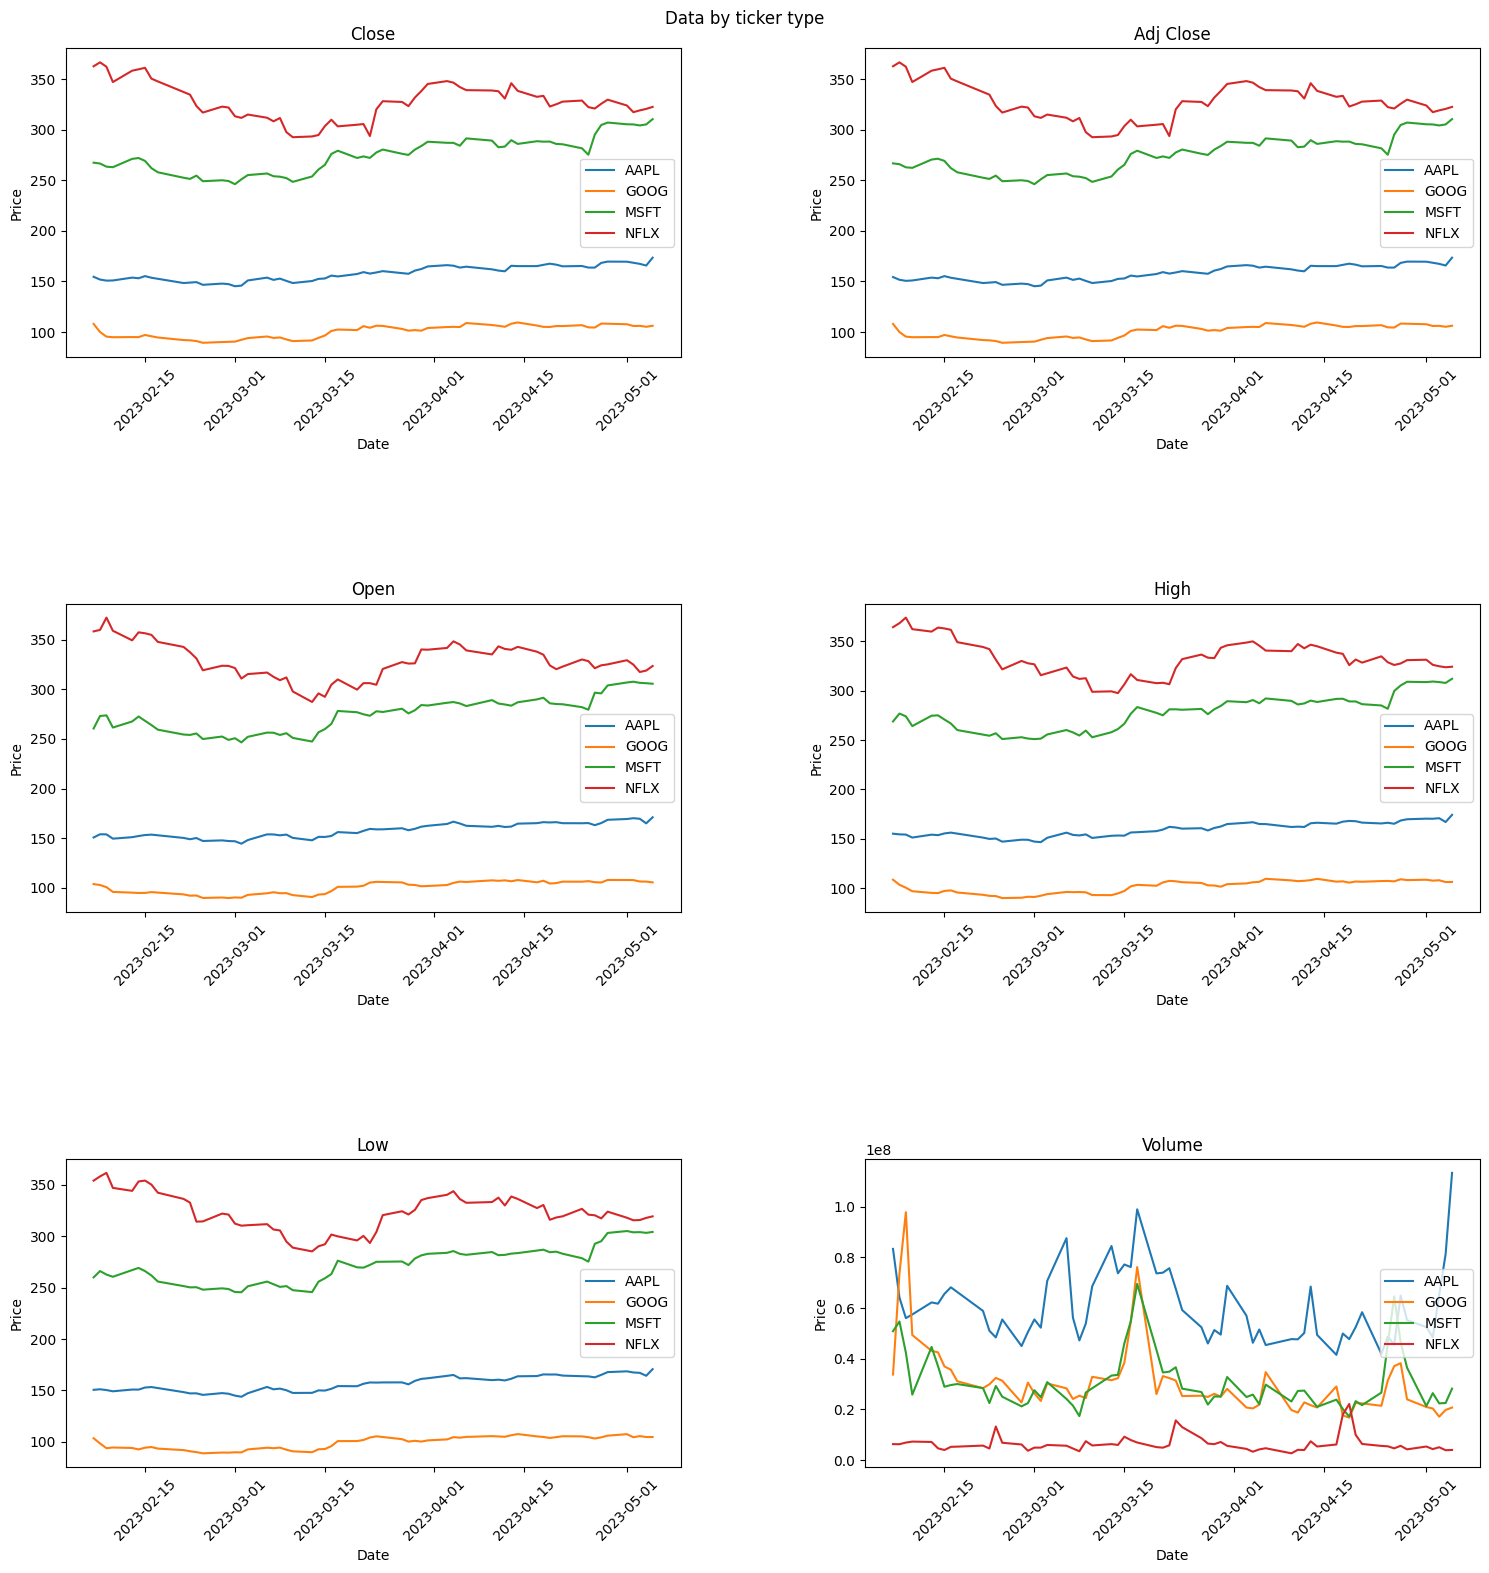

In [24]:
fig, axs = plt.subplots(3, 2, figsize=(15, 16))
fig.suptitle('Data by ticker type')

cols = ['Close', 'Adj Close', 'Open', 'High', 'Low', 'Volume']

for i, col in enumerate(cols):
    row = i // 2
    col = i % 2

    for ticker, data in df.groupby('Ticker'):
        axs[row, col].plot(data['Date'], data[cols[i]], label=ticker)

    axs[row, col].set_title(cols[i])
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend(loc='right')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.8)
plt.show()

In [53]:
df['seasional_first_difference'] = df['Volume'] - df['Volume'].shift(12)
df['seasional_first_difference'].fillna(0, inplace=True)
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,SES,HWES,seasional_first_difference
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,150.639999,6.586825e+07,0.0
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,150.639999,8.093185e+07,0.0
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,150.904999,6.362911e+07,0.0
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,150.662498,5.619932e+07,0.0
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,149.941250,5.198023e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300,105.144085,2.223341e+07,-724400.0
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100,106.322042,1.811465e+07,-402300.0
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300,105.411021,1.608767e+07,-11927100.0
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600,105.515512,1.966332e+07,2139200.0


In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [54]:
df['SES'] = SimpleExpSmoothing(df['seasional_first_difference']).fit(smoothing_level=0.5, optimized=False).fittedvalues

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [55]:
df['HWES'] = ExponentialSmoothing(df['seasional_first_difference'], trend='add', seasonal='add', seasonal_periods=7).fit().fittedvalues

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


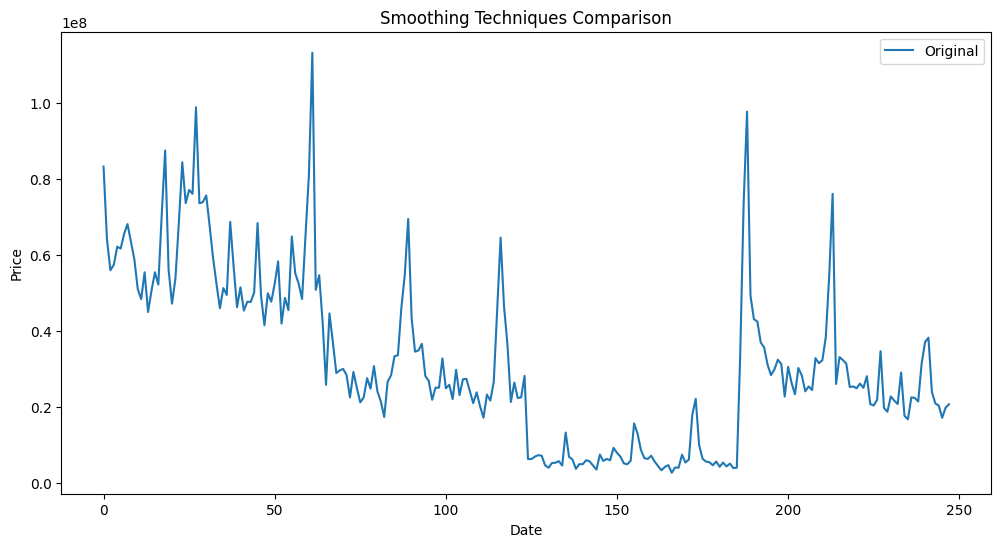

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label='Original')
plt.legend()
plt.title('Smoothing Techniques Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

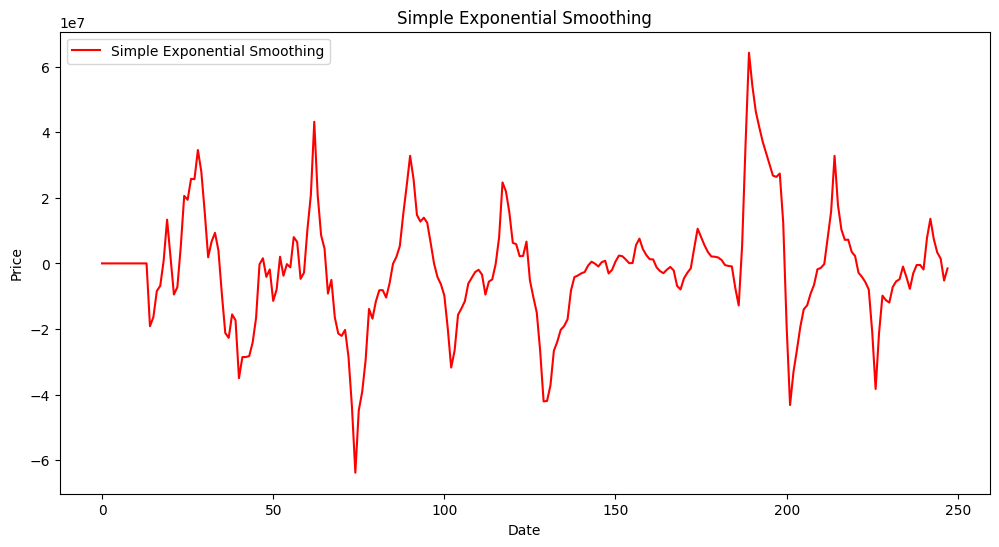

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(df['SES'], label='Simple Exponential Smoothing', color='red')
plt.legend()
plt.title('Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

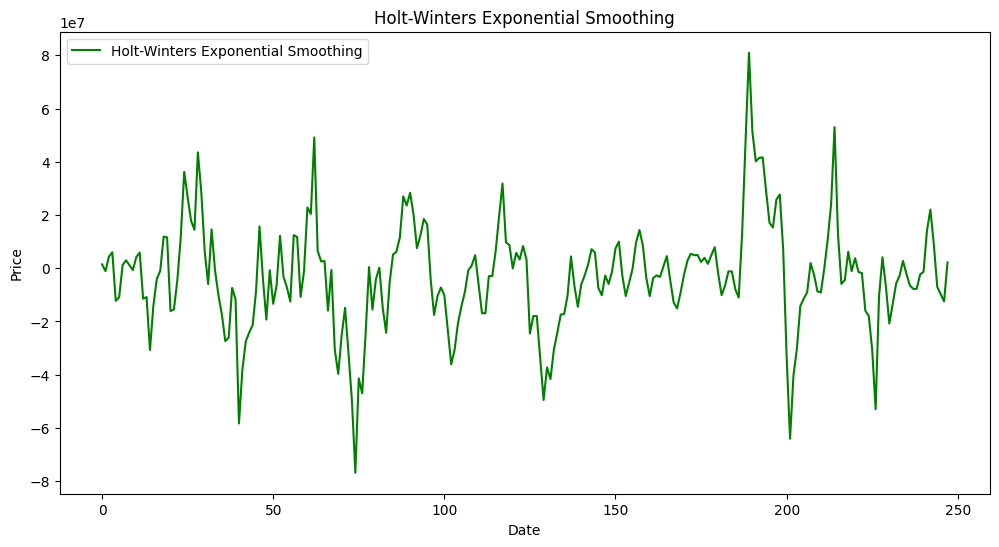

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df['HWES'], label='Holt-Winters Exponential Smoothing', color='green')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [85]:
weekly_data = df.resample('W', on='Date').mean(numeric_only=True)
weekly_data

,Open,High,Low,Close,Adj Close,Volume,SES,HWES,seasional_first_difference
Date,,,,,,,,,
2023-02-12,220.595001,223.581250,216.435185,219.216249,219.006984,4.473531e+07,9.163162e+06,9.083837e+06,6.799631e+06
2023-02-19,220.175791,223.437633,218.033683,221.323685,221.252218,3.386422e+07,-1.893288e+06,-6.345119e+06,-5.266737e+06
2023-02-26,206.760874,207.706563,203.052501,204.945000,204.945000,2.944652e+07,-7.857142e+06,-9.923069e+06,-1.119686e+07
2023-03-05,201.648001,204.126500,199.984499,201.638501,201.638501,2.797850e+07,-1.631793e+07,-1.873822e+07,-1.532960e+07
2023-03-12,202.893248,204.621998,199.370701,200.696001,200.696001,2.966156e+07,-5.385703e+06,-4.961748e+06,-1.910205e+06
2023-03-19,201.566751,206.966002,199.802499,204.723502,204.723502,4.584086e+07,8.077116e+06,1.026690e+07,1.791794e+07
2023-03-26,211.368002,215.112552,208.890500,212.405502,212.405502,3.601794e+07,1.356349e+07,1.131322e+07,6.601920e+06
2023-04-02,218.943500,221.450502,216.821500,219.359499,219.359499,2.816303e+07,-1.091121e+06,-5.796069e+06,-7.828875e+06
2023-04-09,224.700623,227.037497,222.301691,225.697500,225.697500,2.605764e+07,-1.759185e+07,-2.048856e+07,-2.016896e+07


In [88]:
average_close_by_ticker = df.groupby('Ticker')['Close'].mean()
average_close_by_ticker

,Close
Ticker,
AAPL,158.333934
GOOG,100.631532
MSFT,275.039839
NFLX,327.614677


In [90]:
rolling_mean_20 = df['Close'].rolling(window=20).mean()
rolling_mean_20

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
243,106.416500
244,106.470000
245,106.520000
246,106.533001


In [76]:
sma_20=df['High'].rolling(window=20).mean()
sma_20
sma_50=df['High'].rolling(window=50).mean()
sma_50

,High
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
243,101.73822
244,101.97782
245,102.27212
246,102.55092


In [77]:
priceSma_df = pd.DataFrame({
      'High' : df['High'],
      'SMA 20' : sma_20,
      'SMA 50' : sma_50
     })
priceSma_df

,High,SMA 20,SMA 50
0,155.229996,NaN,NaN
1,154.580002,NaN,NaN
2,154.330002,NaN,NaN
3,151.339996,NaN,NaN
4,154.259995,NaN,NaN
...,...,...,...
243,108.680000,107.43775,101.73822
244,107.730003,107.57675,101.97782
245,108.129997,107.67825,102.27212
246,106.300003,107.66625,102.55092


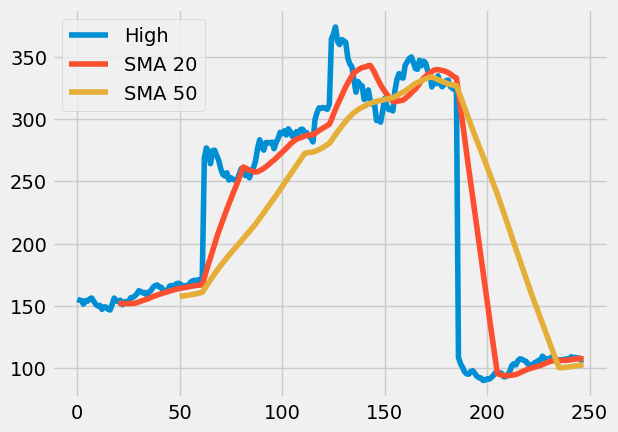

In [78]:
priceSma_df.plot()
plt.show()